In [1]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
import mlxtend
from mlxtend.plotting import plot_decision_regions

# Дерево

### Визуализация дерева

In [13]:
ds = pd.read_csv('chips.csv')
ds.head(6)

,x,y,class
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1
5,-0.524770,0.20980,1


0.7142857142857143


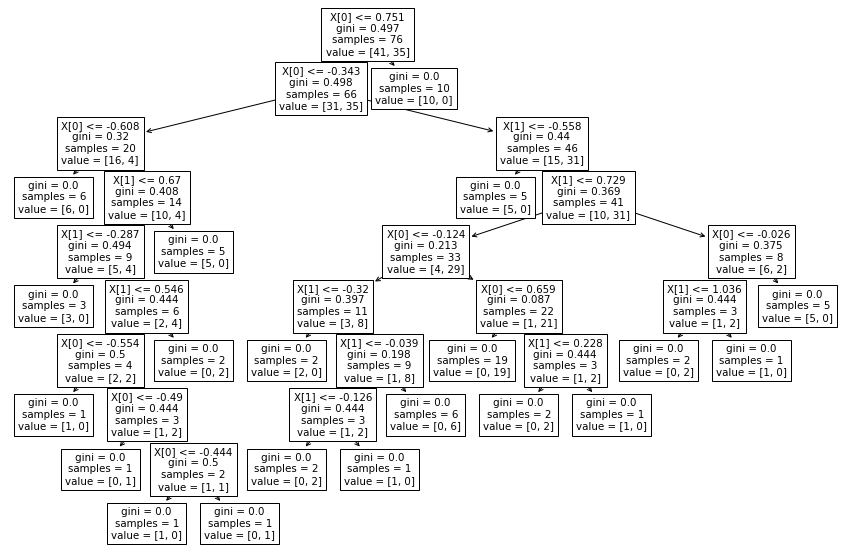

In [14]:
plt.rcParams["figure.figsize"] = (15, 10)

x = ds.drop(columns='class')
y = ds['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)

classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

print(classifier.score(x_test, y_test))
plot_tree(classifier)
pass

### График зависимости

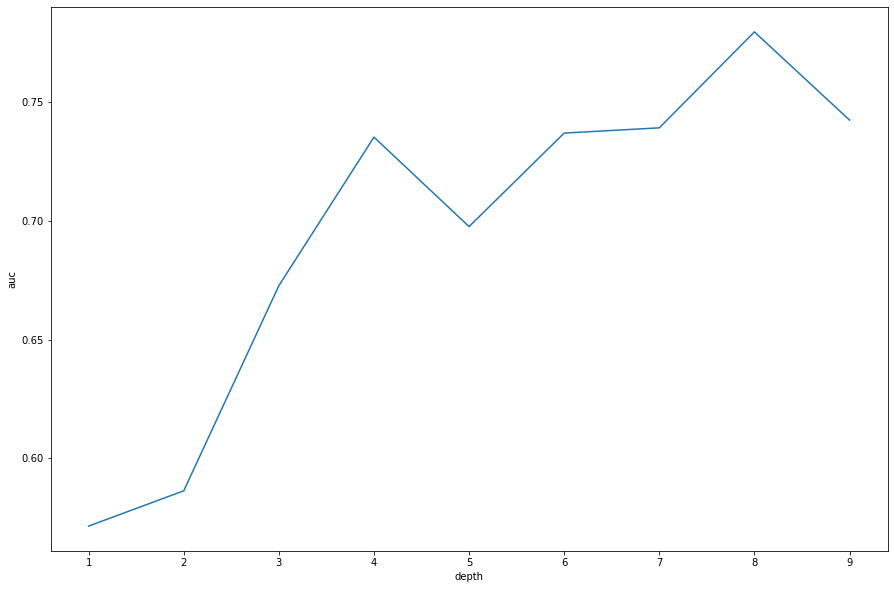

In [15]:
kfold = KFold(5, shuffle=True)
accuracy = []
for i in range(1, 10):
    aucs = []
    for train, test in kfold.split(ds):
        x_train = x.iloc[train]
        y_train = y.iloc[train]
        x_test = x.iloc[test]
        y_test = y.iloc[test]

        model = DecisionTreeClassifier(max_depth=i).fit(x_train, y_train)
        y_pred = model.predict(x_test)
        aucs.append(metrics.roc_auc_score(y_test, y_pred))
    accuracy.append(numpy.mean(aucs))

depth = numpy.arange(1, 10, 1)


plt.plot(depth, accuracy)
plt.xlabel("depth")
plt.ylabel("auc")
plt.show()

# Случайный лес

In [16]:
kfold = KFold(5, shuffle=True)
accuracy = []
count = numpy.arange(10, 200, 10)
for i in count:
    aucs = []
    for train, test in kfold.split(ds):
        x_train = x.iloc[train]
        y_train = y.iloc[train]
        x_test = x.iloc[test]
        y_test = y.iloc[test]

        model = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
        y_pred = model.predict(x_test)
        aucs.append(accuracy_score(y_test, y_pred))
    accuracy.append(numpy.mean(aucs))
print(accuracy)

[0.738768115942029, 0.769927536231884, 0.7884057971014492, 0.7793478260869564, 0.7543478260869565, 0.788768115942029, 0.7626811594202898, 0.6851449275362319, 0.752536231884058, 0.7793478260869565, 0.7630434782608695, 0.7619565217391304, 0.7623188405797101, 0.7547101449275362, 0.7547101449275362, 0.7974637681159421, 0.772463768115942, 0.7887681159420289, 0.7130434782608696]


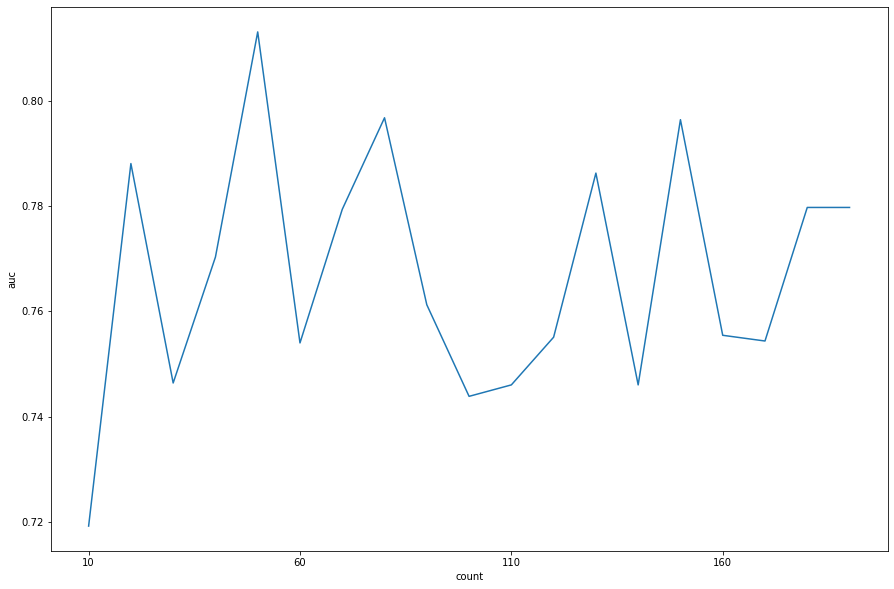

In [6]:
plt.xticks(range(10, 200, 50))
plt.plot(count, accuracy)
plt.xlabel("count")
plt.ylabel("auc")
plt.show()

In [22]:
x_ = ds.iloc[:,:2]
y_ = ds.iloc[:,2:]
x_train_, x_test_, y_train_, y_test_ = train_test_split(x_, y_, test_size=0.20)
y_train_ = y_train_.values.ravel()

x_ = numpy.array(x_)
y_ = numpy.array(y_).ravel()

<class 'pandas.core.frame.DataFrame'>


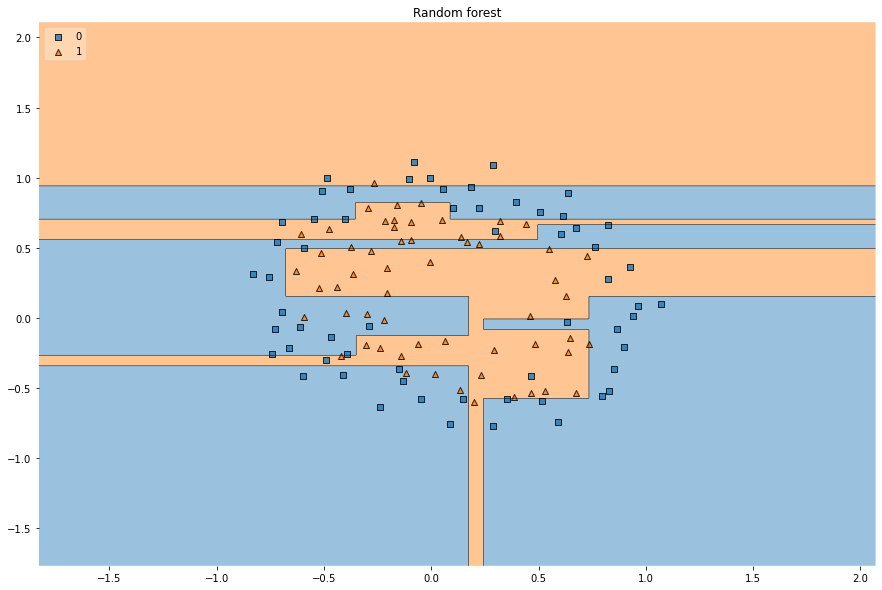

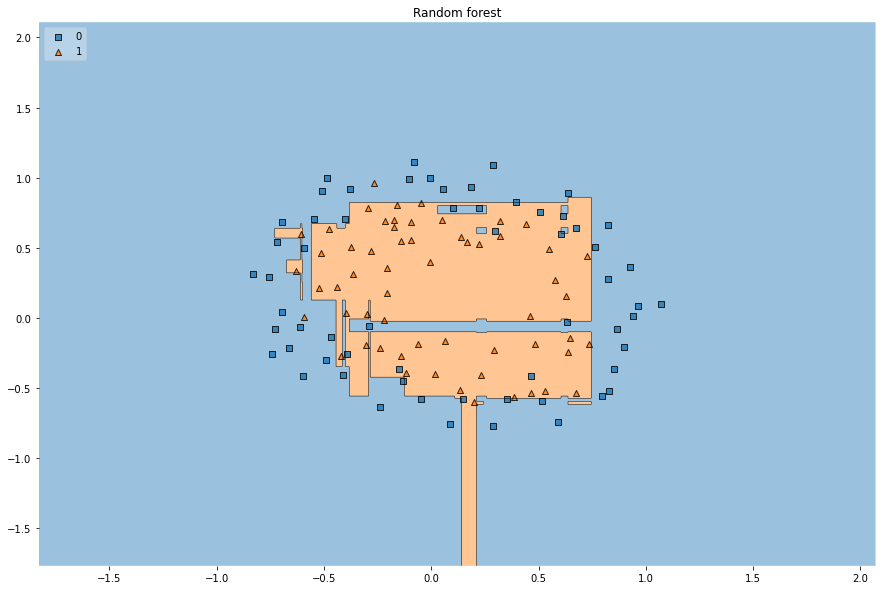

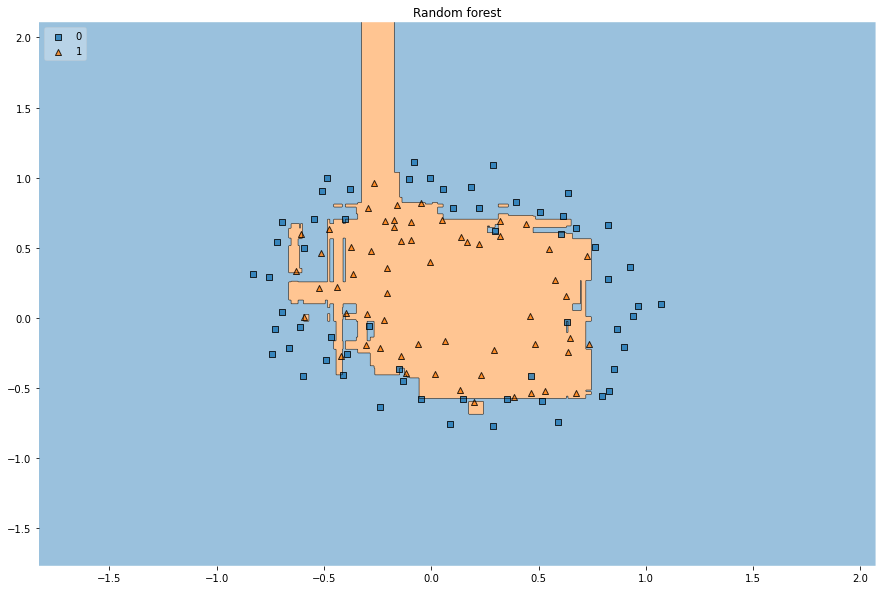

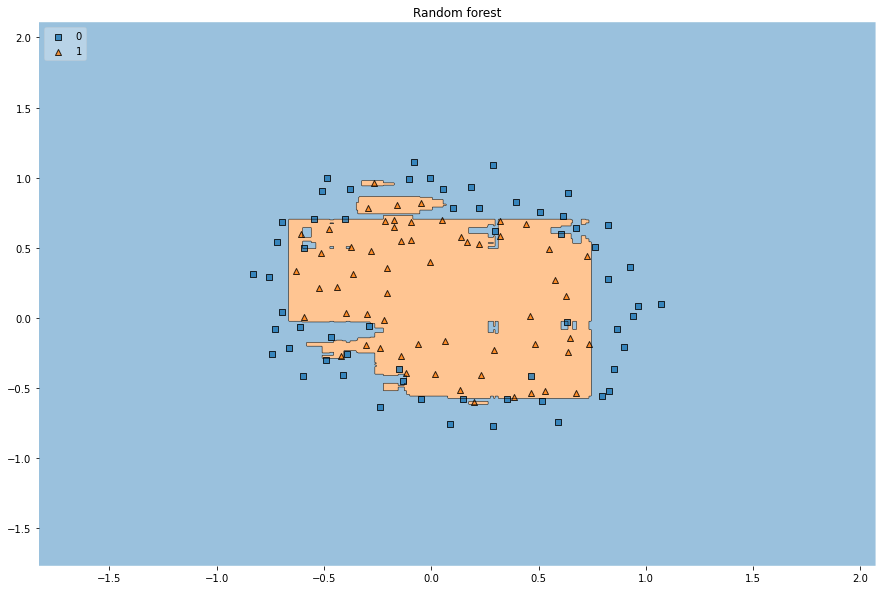

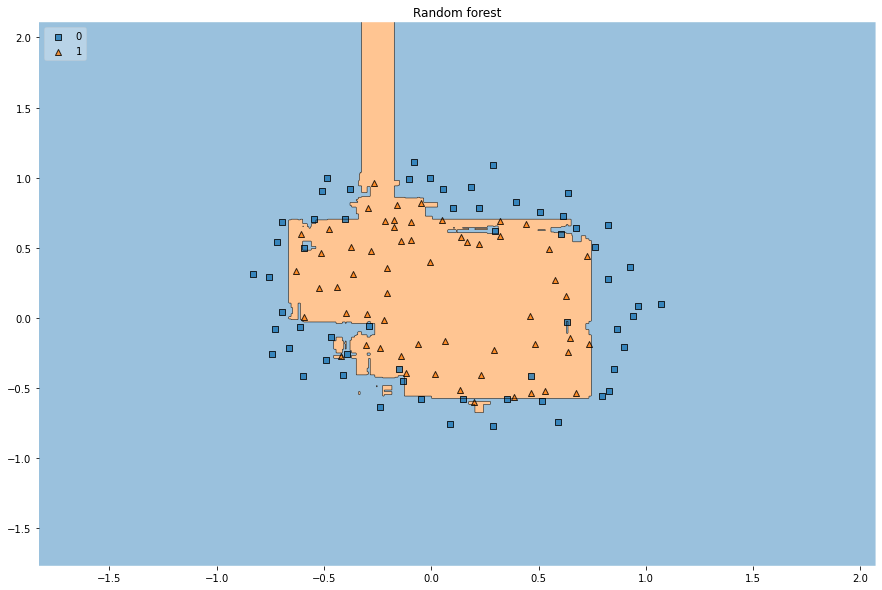

In [24]:
print(type(x_test_))

count = [1, 3, 10, 20, 100]
for i in count:
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(x_train_, y_train_)
    plot_decision_regions(x_, y_, X_highlight=None, clf=rfc, legend=2)
    plt.title('Random forest')
    plt.show()

# Бустинг

In [18]:
kfold = KFold(5, shuffle=True)
accuracy = []
count = numpy.arange(100, 1001, 50)

for i in count:
    aucs = []
    for train, test in kfold.split(ds):
        x_train = x.iloc[train]
        y_train = y.iloc[train]
        x_test = x.iloc[test]
        y_test = y.iloc[test]

        model = AdaBoostClassifier(n_estimators=i).fit(x_train, y_train)
        y_pred = model.predict(x_test)
        aucs.append(accuracy_score(y_test, y_pred))
    accuracy.append(numpy.mean(aucs))

pass

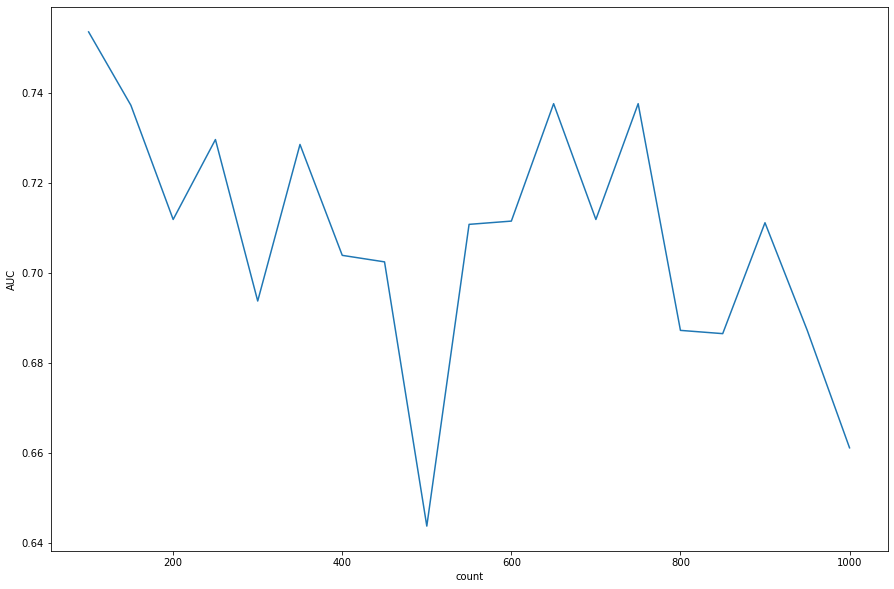

In [19]:
plt.plot(count, accuracy)
plt.xlabel("count")
plt.ylabel("AUC")
plt.show()

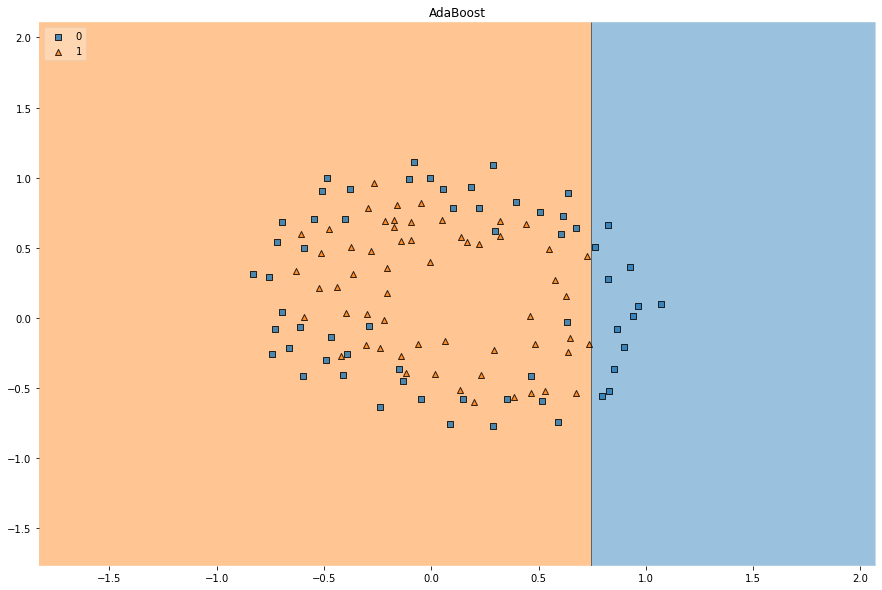

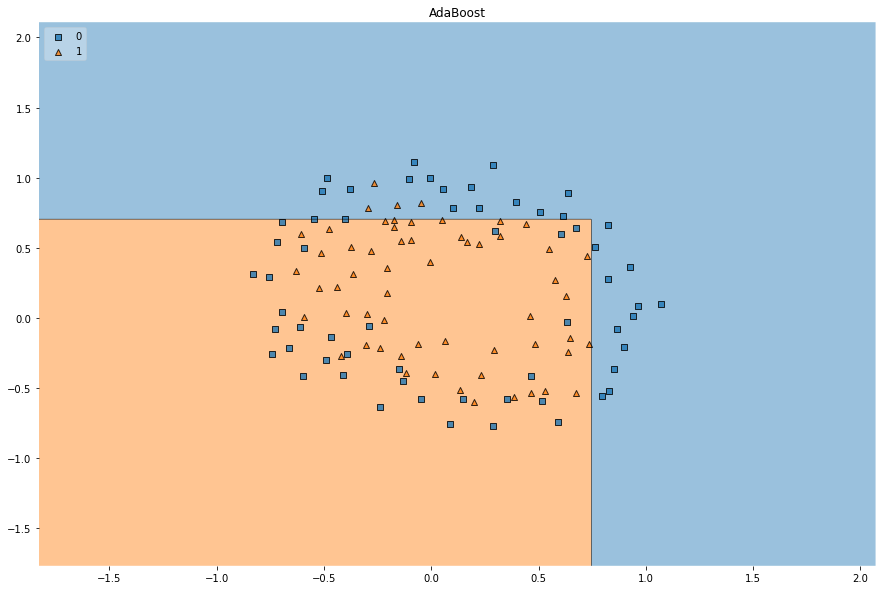

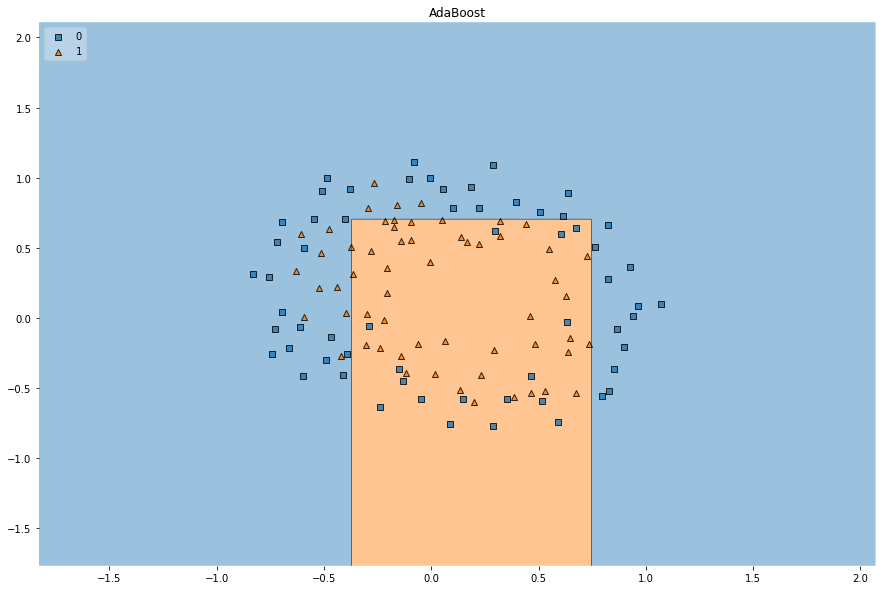

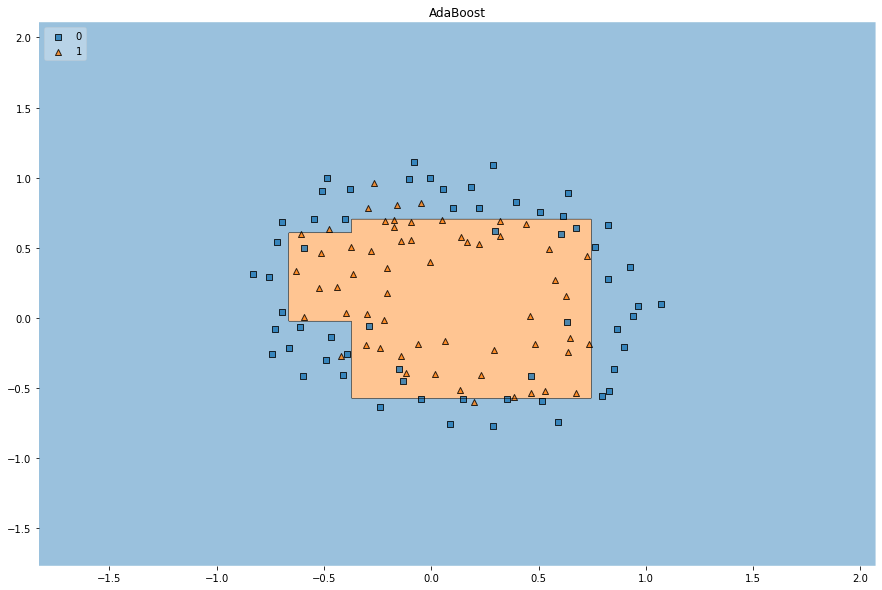

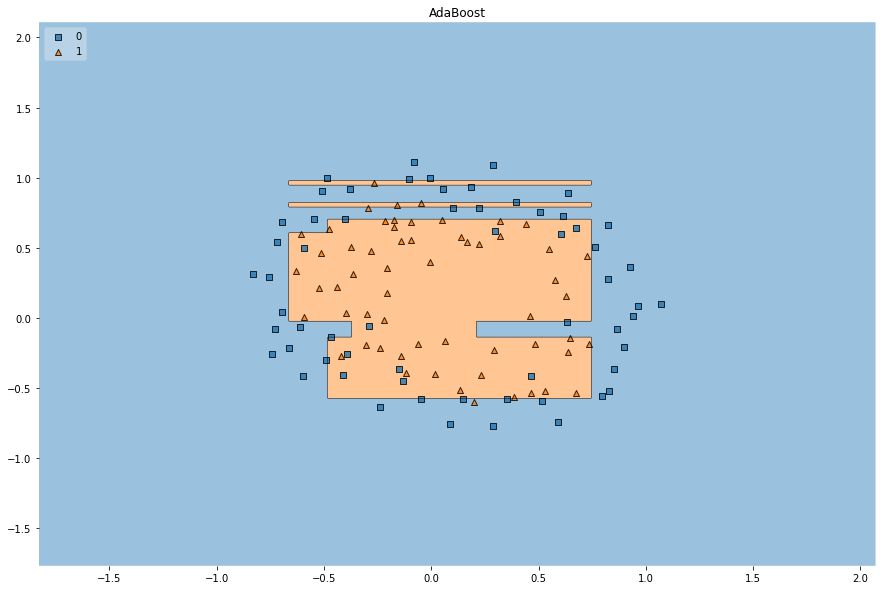

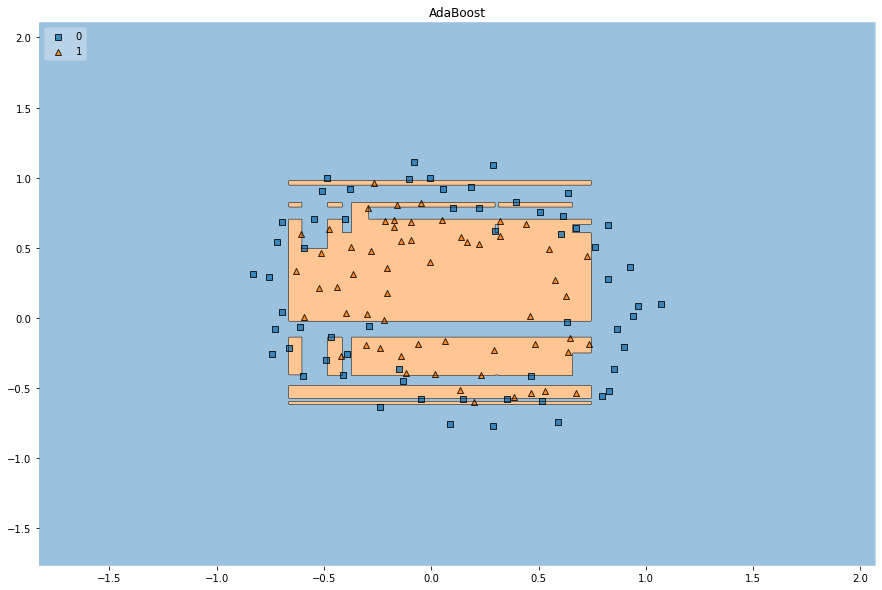

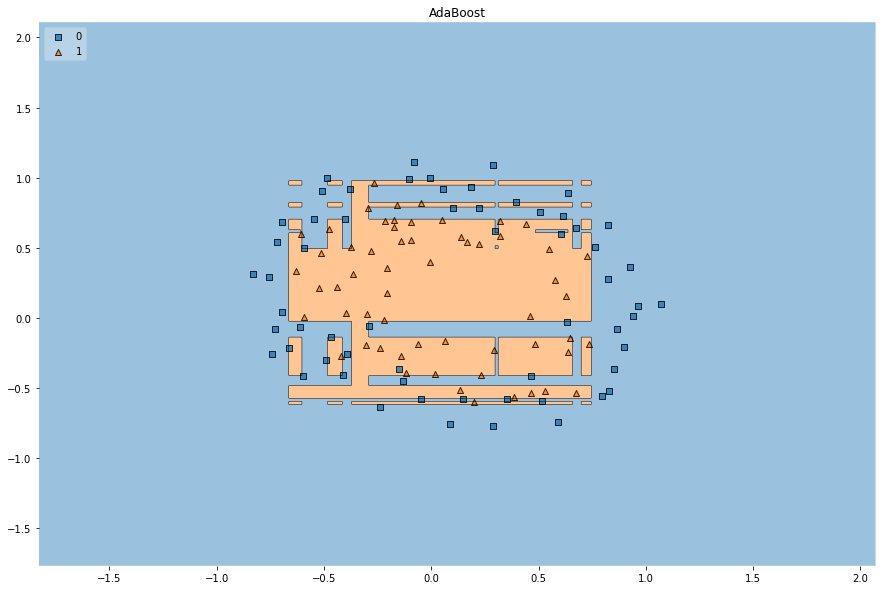

In [28]:

count = [1, 2, 3, 10, 20, 100, 500]
for i in count:
    clf = AdaBoostClassifier(n_estimators=i)
    clf.fit(x_train_, y_train_)
    plot_decision_regions(x_, y_, X_highlight=None, clf=clf, legend=2)
    plt.title('AdaBoost')
    plt.show()